In [70]:
import pandas as pd
import geopandas as gpd
import csv
import os
import sys
import numpy as np
import zipfile as zf
import matplotlib as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [65]:
# worldwide refugee data: http://popstats.unhcr.org/en/time_series

In [4]:
!curl -O "https://www.dhs.gov/sites/default/files/publications/YRBK%202015%20RFA%20Excel%20Final.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  106k  100  106k    0     0   219k      0 --:--:-- --:--:-- --:--:--  227k


In [5]:
ref = zf.ZipFile('YRBK%202015%20RFA%20Excel%20Final.zip', 'r')
ref.extractall()

In [56]:
usa = pd.read_excel('YRBK 2015 RFA Excel Final/fy2015_table13.xls', skiprows=3, skip_footer=2)

In [60]:
usa.columns = ['Year', 'USA_numbers']

In [29]:
refugees = pd.read_csv('unhcr_popstats_export_time_series_2017_02_10_174728.csv', skiprows = 3)

In [30]:
refugees.head(10)

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000
5,1951,Germany,Various/Unknown,Refugees (incl. refugee-like situations),265000
6,1951,Denmark,Various/Unknown,Refugees (incl. refugee-like situations),2000
7,1951,Spain,Various/Unknown,Refugees (incl. refugee-like situations),2000
8,1951,France,Various/Unknown,Refugees (incl. refugee-like situations),290000
9,1951,United Kingdom,Various/Unknown,Refugees (incl. refugee-like situations),208000


In [32]:
refugees.drop(['Country / territory of asylum/residence', 'Origin', 'Population type'],
             axis = 1, inplace = True)

In [35]:
refugees.head()

,Year,Value
0,1951,180000
1,1951,282000
2,1951,55000
3,1951,168511
4,1951,10000


In [43]:
refugees['Year'] = pd.to_numeric(refugees['Year'], errors='coerce')
refugees['Value'] = pd.to_numeric(refugees['Value'], errors='coerce')

In [51]:
refugees = refugees.groupby('Year').sum()

In [55]:
refugees = refugees.reset_index()

In [61]:
merged = pd.merge(usa, refugees, on='Year')

In [63]:
merged['percentage'] = merged.USA_numbers / merged.Value

In [90]:
merged.percentage = merged.percentage * 100

In [91]:
merged.head()

,Year,USA_numbers,Value,percentage
0,1980,207116,8287287.0,2.499201
1,1981,159252,9611176.0,1.656946
2,1982,98096,10218319.0,0.960001
3,1983,61218,10519723.0,0.581935
4,1984,70393,10557306.0,0.666770


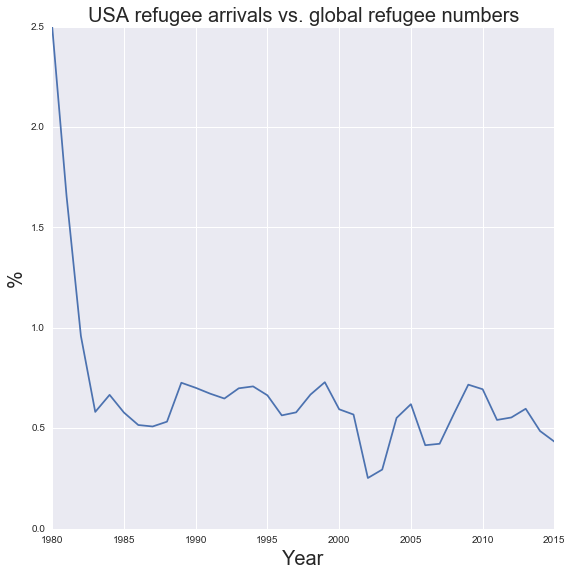

In [97]:
f, ax = plt.subplots(figsize=(9,9))
plt.title('USA refugee arrivals vs. global refugee numbers', size=20)
plt.ylabel('%', size=20)
plt.xlabel('Year', size=20)
plt.plot(merged.Year, merged.percentage)
#plt.plot(merged.Year, merged.Value)

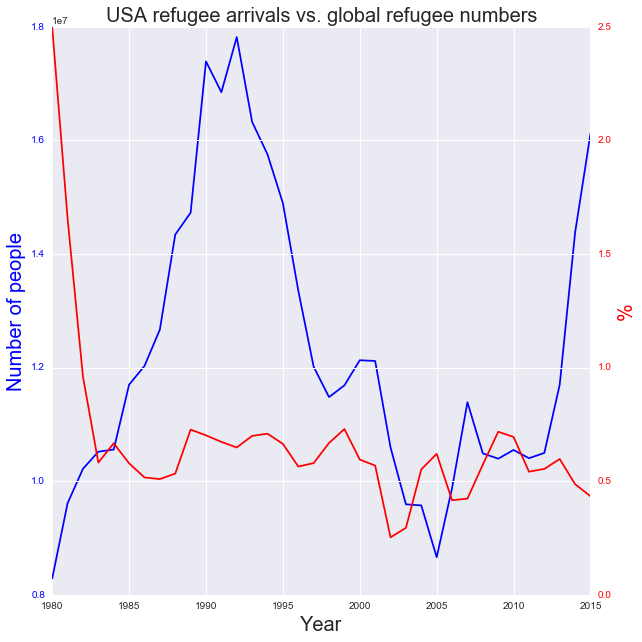

In [107]:
fig, ax1 = plt.subplots(figsize=(9,9))

plt.title('USA refugee arrivals vs. global refugee numbers', size=20)

ax1.plot(merged.Year, merged.Value, 'b-')
ax1.set_xlabel('Year', size=20)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of people', size=20, color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(merged.Year, merged.percentage, 'r-')
ax2.set_ylabel('%', size=20, color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

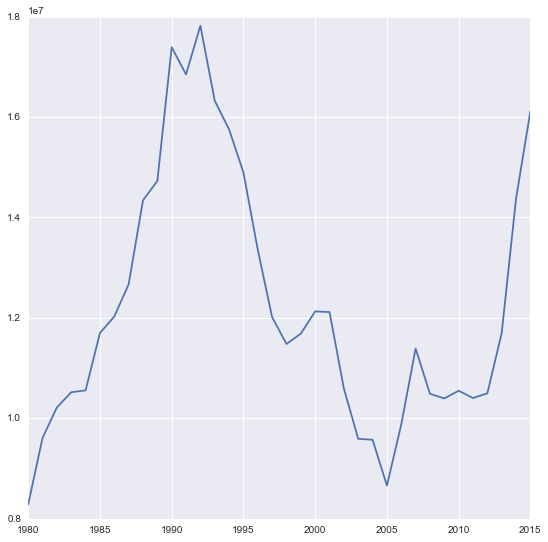

In [87]:
f, ax = plt.subplots(figsize=(9,9))
plt.plot(merged.Year, merged.Value)